# Dynamic Interactions

[Wolfram Barfuss](https://wbarfuss.github.io) | [University of Bonn](https://www.uni-bonn.de) | 2024/2025 <br>
▶ **Complex Systems Modeling of Human-Environment Interactions**

## Motivation | **Futures and environments**

Prototypical models did not explicitly consider future environmental consequences of strategic interactions (@fig-environmental-dynamics). 

![Environmental dynamics are relevant to consider](images/03.03-EnvironmentalDynamics.dio.png){#fig-environmental-dynamics}

However, many real-world scenarios involve strategic interactions with environmental consequences. For example, the tragedy of the commons, agreements, and threshold public goods can be extended to include ecological consequences. In this lecture, we will introduce **dynamic games**, particularly *stochastic* or *Markov games*, to model strategic interactions with environmental consequences.

*Stochastic games* integrate [*Markov chains*](02.04-StateTransitions.ipynb), [*Markov decision processes*](03.01-SequentialDecisions.ipynb), and [*game theory*](03.01-SequentialDecisions.ipynb) to model strategic interactions in dynamic environments. They are particularly useful for modeling human-environment interactions, where the environment is affected by human actions and, in turn, affects human behavior.

### **Advantages** of dynamic games

Using **dynamic games**, particularly *stochastic games* to model strategic interactions with environmental consequences has several advantages:

* **inherently stochastic** - to account for uncertainty
* **nonlinear** - to account for structural changes
* **agency** - to account for human behavior
* **interactions** - to account for strategic interactions
* **future-looking** - to account for the trade-off between short-term and long-term
* **feedback** - between multiple agents and the environment

Stochastic games also have structural benefits that make them compatible with numerical computer modeling due to their discrete action and state sets, as well as their advancement in discrete time intervals.

### **Learning goals**

After this lecture, students will be able to:

* Describe the elements of a stochastic game
* Apply stochastic games to model human-environment interactions
* Analyze the strategic interactions in stochastic games



In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style as style; style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (7.8, 2.5); plt.rcParams['figure.dpi'] = 300
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]  # get the first color of the default color cycle
plt.rcParams['axes.facecolor'] = 'white'; plt.rcParams['grid.color'] = 'gray'; plt.rcParams['grid.linewidth'] = 0.25; 

## Dynamic games | **Strategic interactions with environmental consequences**

![Multiagent-Environment Interface](images/03.03-MultiAgentEnvironment.dio.png){#fig-multiagent-environment}

Here, we focus on environments with a discrete state set in discrete time. These specifications are commonly called **stochastic** or **Markov games**. They consist of the following elements:

* A discrete set of environmental **contexts** or **states** $\mathcal S = \{S_1, \dots, S_Z\}$.
    * We denote an environmental state by $s \in \mathcal S$.
* A finate set of $N$ agents $\mathcal I = \{2,\dots, N\}$ participating in an interaction.
* For each agent $i\in\mathcal I$, a discrete set of **options** or **actions** $\mathcal A^i = \{A^i_1, \dots, A^i_M\}$.
    * Let's denote the joint action set by $\mathbf{\mathcal A} = \mathcal A^1 \times \dots \times A^N$.
    * An action profile $\mathbf a = (a^1,\dots,a^N) \in \mathbf{\mathcal A}$ is a joint action of all agents.

Time $t$ advances in discrete steps $t=0,1,2,\dots$, and agents choose their actions simultaneously.

* We denote the state at time $t$ by $s_t$ and the joint action by $\mathbf a_t$.

The transitions tensor $T: \mathcal S \times \mathbf{\mathcal A} \times \mathcal S \to [0,1]$ defines the **environmental dynamics**. 

* $T(s, \mathbf a, s')$ is the probability of transitioning from state $s\in\mathcal S$ to $s'\in\mathcal S$ given the joint action $\mathbf a$.
* Thus, $\sum_{s'} T(s, \mathbf a, s') = 1$ must hold for all $s\in\mathcal S$ and $\mathbf a\in\mathbf{\mathcal A}$.

The reward tensor $\mathbf R: \mathcal I \times \mathcal S \times \mathbf{\mathcal A} \times \mathcal S \to \mathbb R$ defines the agents' **short-term** **welfare**, **utility**, **rewards**, or **payoffs**.

* $R^i(s, \mathbf a, s')$ is the reward agent $i$ receives for transitioning from state $s$ to $s'$ given the joint action $\mathbf a$.
* We assume that it is each agent $i$'s goal to maximize their expected discounted sum of future rewards, $G^i = \sum_{t=0}^\infty (\gamma^i)^t R^i(s_t, \mathbf a_t, s_{t+1})$, where $\gamma^i\in[0,1)$ is the discount factor.

We assume that agents can condition their probabilities of choosing actions on the current state $s_t$, yielding so-called Markov **policies** or **strategies**, $\mathbf x: \mathcal I \times \mathcal S  \times \mathcal A^i \to [0, 1]$.

* $x^i(s, a)$ is the probability agent $i$ chooses action $a$ in state $s$.


## Application | **Ecological public good**

We apply the stochastic game framework to integrate the fact that we are embedded in a shared environment and care about the future to some extent. We do so by considering a public good game with ecological consequences (@fig-ecological-public-good), which allows us to answer how the strategic incentives depend on their level of care for future rewards.

![Ecological public good collective decision-making environment](images/03.03-EcologicalPublicGood.dio.png){#fig-ecological-public-good}

### States, agents and actions

The environment consists of two states, $\mathcal S = \{\textsf{p}, \textsf{d}\}$, representing a **prosperous** and a **degraded** state of the environment. 


In [ ]:
state_set = ['prosperous,' 'degraded']; p=0; g=1; Z=2

We also defined two Python variable `p=0` and `g=1` to serves as readable and memorable indices to represent the environmental contexts.

There are $2$ identical agents. In each state $s \in \mathcal S$, each agent $i \in \{1, 2\}$ can choose within their action set between either **cooperation** or **defection**, $\mathcal A^i = \{\mathsf{c,d}\}$. 

In [ ]:
action_sets = ['cooperate', 'defect']; c=0; d=1; M=2

Likewise, we define two Python variables, `c=0` and `d=1`, to serve as readable and memorable indices to represent the agents' actions.

We denote the number of cooperating agents by $N_c$. 
The number of defecting agents is $N_d = N - N_c$.

### **Transitions** | Environmental dynamics

We represent the **environmental dynamics**, i.e., the transitions between environmental state contexts, in a $Z \times M \times M \times Z$ tensor, where $Z$ is the number of states and $M$ is the number of actions. In this representation, 

* the first dimension corresponds to the **current state**,
* the second to the action profile of the  **first agent**,
* the third to the action profile of the  **other agent**, and
* the fourth and last dimension corresponds to the **next state**.

In [ ]:
TransitionTensor = np.zeros((Z, M, M, Z), dtype=object)

The *environmental dynamics* are then governed by two parameters: a collapse leverage, $q_c$, and a recovery probability, $p_r$.

In [ ]:
qc, pr = sp.symbols('q_c p_r')

A collapse from the prosperous to the degraded state occurs with a transition probability 

$$T(\mathsf p, \mathbf a, \mathsf g) = \frac{N_d}{N}  q_c. $$ 



In [ ]:
TransitionTensor[p, c, c, g] = 0  # no agent defects
TransitionTensor[p, d, c, g] = qc/2  # one agent defects
TransitionTensor[p, c, d, g] = qc/2  # other agent defects
TransitionTensor[p, d, d, g] = qc  # all agents defect

Thus, if all agents defect, the environment collapses with probability $q_c$. The collapse leverage indicates how much impact a defecting agent exerts on the environment. 
The environment remains within the prosperous state with probability, $T(\mathsf p, \mathbf a, \mathsf p) = 1 - \frac{N_d}{N}  q_c$.

In [ ]:
TransitionTensor[p, : , :, p] = 1 - TransitionTensor[p, : , :, g]

In the degraded state, we set the recovery to occur with probability,

$$T(\mathsf g, \mathbf a, \mathsf p) = p_r,$$

independent of the agents’ actions.

In [ ]:
TransitionTensor[g, :, :, p] = pr

The probability that the environment remains in the degraded state is then, $T(\mathsf g, \mathbf a, \mathsf g) = 1 - p_r$.

In [ ]:
TransitionTensor[g, :, :, g] = 1-pr

**Together**, our transition tensor is then given by

In [ ]:
sp.Array(TransitionTensor)

[[[[1, 0], [1 - q_c/2, q_c/2]], [[1 - q_c/2, q_c/2], [1 - q_c, q_c]]], [[[p_r, 1 - p_r], [p_r, 1 - p_r]], [[p_r, 1 - p_r], [p_r, 1 - p_r]]]]

Last, we make sure that our transition tensor is normalized, i.e., the sum of all transition probabilities from a state-joint-action pair to all possible next states equals one, $\sum_{s'} T(s, \mathbf a, s') = 1$.

In [ ]:
TransitionTensor.sum(-1)

array([[[1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1]]], dtype=object)

### **Rewards** | Short-term welfare

In [ ]:
RewardTensor = np.zeros((2, Z, M, M, Z), dtype=object)

Rewards in the prosperous state follow the standard public goods game with a synergy factor $r$ and a cost of cooperation $c$.

In [ ]:
r, cost = sp.symbols('r c')

The rewards for cooperating and defecting agents are then given by

$$ R^i(\mathsf p, a^i, a^{-i}, \mathsf p) = \begin{cases} \frac{r c (N_c +1)}{N}  - c, & \text{if } a^i = \mathsf c, \\ \frac{r c N_c}{N}, & \text{if } a^i = \mathsf d. \end{cases} $$

In [ ]:
RewardTensor[:, p, c, c, p] = r*cost - cost
RewardTensor[:, p, d, d, p] = 0
RewardTensor[0, p, c, d, p] = RewardTensor[1, p, d, c, p] = r*cost/2 - cost
RewardTensor[0, p, d, c, p] = RewardTensor[1, p, c, d, p] = r*cost/2

When a state transition involves the degraded state, $\mathsf{g}$, the agents only receive an environmental collapse impact $m$:

In [ ]:
m = sp.symbols('m')

$$R^i(\mathsf p, \mathbf a, \mathsf g) = R^i(\mathsf g, \mathbf a, \mathsf g) = R^i(\mathsf g, \mathbf a, \mathsf p) = m, \quad \text{for all} \ \mathbf a, i.$$

In [ ]:
RewardTensor[:, p, :, :, g] = RewardTensor[:, g, :, :, g] = RewardTensor[:, g, :, :, p] = m 

**Together**, our reward tensor is then given by

In [ ]:
sp.Array(RewardTensor)

[[[[[c*r - c, m], [c*r/2 - c, m]], [[c*r/2, m], [0, m]]], [[[m, m], [m, m]], [[m, m], [m, m]]]], [[[[c*r - c, m], [c*r/2, m]], [[c*r/2 - c, m], [0, m]]], [[[m, m], [m, m]], [[m, m], [m, m]]]]]

### **DeepDive** | Subsituting parameter values

In this chapter, we defined the transition and reward tensors as general `numpy` arrays with data types `object`, which we filled with symbolic expressions from `sympy`. To manipulate and substitute these expressions, we can use the `sympy.subs` method, however, not directly on the `numpy` array. Instead, we define a helper function `substitute_in_array` that takes a `numpy` array and a dictionary of substitutions and returns a new array with the substitutions applied.

In [ ]:
def substitute_in_array(array, subs_dict):
    result = array.copy()
    for index,_ in np.ndenumerate(array):
        if isinstance(array[index], sp.Basic):
            result[index] = array[index].subs(subs_dict)
    return result

To make this work, it seems to be of critical importance that the subsitution dictionary is given as a dictionary in the form of `{<symbol_variable>: <subsitution>, ...}` and *not* as `dict(<symbol_variable>=<subsitution>, ...)`. For example, 

In [ ]:
substitute_in_array(TransitionTensor, {pr:0.01, qc:0.2}).astype(float)

array([[[[1.  , 0.  ],
         [0.9 , 0.1 ]],

        [[0.9 , 0.1 ],
         [0.8 , 0.2 ]]],


       [[[0.01, 0.99],
         [0.01, 0.99]],

        [[0.01, 0.99],
         [0.01, 0.99]]]])

### **Policies** | Strategic choices

The **crucial question** is **whether** or not the agents should **cooperate** or defect in the **prosperous state**, $\mathsf p$, under the assumption that agents are **anonymous** - and how to answer depends on the parameter conditions $q_c$,  $p_r$, $\gamma$, $r$, $c$, and $m$.

Anonymity means that agents do not consider the game's history, i.e., behave according to a Markov policy. We analyze the two extreme cases: An agent can either cooperate or defect in the prosperous state, $\mathsf p$. 

Generally, a single agent's policy is represented by a  $Z \times M$ tensor. The cooperative policy is then given by

In [ ]:
Xsa_coo =  0.5 * np.ones((Z, M))
Xsa_coo[p, c] = 1
Xsa_coo[p, d] = 0

The defective policy is given by

In [ ]:
Xsa_def =  0.5 * np.ones((Z, M))
Xsa_def[p, c] = 0
Xsa_def[p, d] = 1

To obtain the incentive regimes, we need to calculate the long-term values of the four policy combinations:

* mutual cooperation $(\mathsf c \mathsf c)$, i.e. both agents cooperate,
* unilateral defection $(\mathsf d \mathsf c)$, i.e. one agent defects, and the other cooperates,
* unilateral cooperation $(\mathsf c \mathsf d)$, i.e. one agent cooperates, and the other defects, and
* mutual defection $(\mathsf d \mathsf d)$, i.e. both agents defect.

They can also be represented by a *meta-game* payoff matrix, where the rows represent the focal agent's policies, and the columns represent the opponent's policies,

| | $\mathsf c$ | $\mathsf d$ |
| --- | --- | --- |
| $\mathsf c$ | $v_{\mathsf c \mathsf c}$ | $v_{\mathsf c \mathsf d}$ |
| $\mathsf d$ | $v_{\mathsf d \mathsf c}$ | $v_{\mathsf d \mathsf d}$ |

We summarize these respecitve joint policies in four $N \times Z \times M$ tensors,

In [ ]:
Xisa_cc = np.array([Xsa_coo, Xsa_coo])
Xisa_cd = np.array([Xsa_coo, Xsa_def])
Xisa_dc = np.array([Xsa_def, Xsa_coo])
Xisa_dd = np.array([Xsa_def, Xsa_def])

### **State values** | Long-term welbeing

Long-term values are defined precisely like in the single-agent case ([03.01-SequentialDecisions](03.01-SequentialDecisions.ipynb)) except that they now depend on the **joint policy** $\mathbf x$ and each agent $i$ holds their own values.

Given a joint policy $\mathbf x$, we define the **state value** for agent $i$, $v^i_{\mathbf x}(s)$,  as the expected gain, $\mathbb E_\mathbf{x}[ G^i_t | S_t = s]$, when starting in state $s$ and the following the policy $\mathbf x$,

$$
v^i_\mathbf{x}(s) := \mathbb E_\mathbf{x}[ G^i_t | S_t = s] = (1-\gamma^i) \mathbb E_\mathbf{x}\left[\sum_{\tau=t}^\infty (\gamma^i)^\tau R^i_{t+\tau+1} | S_t = s\right], \quad \text{for all } s \in \mathcal S,
$$

They are also computable like in the single-agent case ([03.01-SequentialDecisions](03.01-SequentialDecisions.ipynb)) by solving the **Bellman equations** in matrix form,

$$\mathbf v^i_\mathbf{x} = (1-\gamma^i) (\mathbf 1_Z - \gamma^i\underline{\mathbf T}_\mathbf{x})^{-1} \mathbf R^i_\mathbf{x}.$$

Before we solve this equation, we focus on computing the effective **transition matrix** $\underline{\mathbf T}_\mathbf{x}$ and the **average reward** $\mathbf R^i_\mathbf{x}$, given a joint policy $\mathbf x$.

The **transition matrix** $\underline{\mathbf T}_\mathbf{x}$ is a $Z \times Z$ matrix, where the element $T_\mathbf{x}(s,s')$ is the probability of transitioning from state $s$ to $s'$ under the joint policy $\mathbf x$. It is computed as

$$T_\mathbf{x}(s,s') = \sum_{a^1 \in \mathcal A^1} \dots \sum_{a^N \in \mathcal A^N} x^1(s, a^1) \dots x^N(s, a^N) T(s, a^1, \dots, a^N, s').$$

For $N=2$, we implement in Python as follows:

In [ ]:
def compute_symbolic_TransitionMatrix_Tss(policy_Xisa, 
                                          transitions_Tsas):
    s, a, b, s_ = 0, 1, 2, 3  # defining indices for convenience
    
    Tss = sp.Matrix(np.einsum(policy_Xisa[0], [s, a], 
                              policy_Xisa[1], [s, b],
                              transitions_Tsas, [s, a, b, s_], 
                              [s,s_]))   
    return sp.simplify(Tss)

For example, the transition matrix for the joint policy $\mathbf x = (\mathsf d, \mathsf c)$ is then given by

In [ ]:
compute_symbolic_TransitionMatrix_Tss(Xisa_dc, TransitionTensor)

Matrix([
[1.0 - 0.5*q_c,       0.5*q_c],
[      1.0*p_r, 1.0 - 1.0*p_r]])

The **average reward** $\mathbf R^i_\mathbf{x}$ is a $N \times Z$-matrix, where the element $R_\mathbf{x}^i(s)$ is the expected reward agent $i$ receives in state $s$ under the joint policy $\mathbf x$. It is computed as

$$ R_\mathbf{x}^i(s) = \sum_{a^1 \in \mathcal A^1} \dots \sum_{a^N \in \mathcal A^N} x^1(s, a^1) \dots x^N(s, a^N) T(s, a^1, \dots, a^N, s') R^i(s, a^1, \dots, a^N, s').$$

For $N=2$, we implement in Python as follows:

In [ ]:
def compute_symbolic_AverageReward_Ris(policy_Xisa, 
                                       transitions_Tsas, 
                                       rewards_Risas):
    i, s, a, b, s_ = 0, 1, 2, 3, 4 # defining indices for convenience
    Ris = sp.Array(np.einsum(policy_Xisa[0], [s, a], 
                             policy_Xisa[1], [s, b],
                             transitions_Tsas, [s, a, b, s_], 
                             rewards_Risas, [i, s, a, b, s_],
                             [i, s]))
    return sp.simplify(Ris)

For example, the average reward under the joint policy $\mathbf x = (\mathsf d, \mathsf c)$ is then given by

In [ ]:
compute_symbolic_AverageReward_Ris(Xisa_dc, TransitionTensor, RewardTensor)

[[-c*r*(0.5*q_c - 1.0)/2 + 0.5*m*q_c, 1.0*m], [-c*(0.5*q_c - 1.0)*(r - 2)/2 + 0.5*m*q_c, 1.0*m]]

With the transition matrix $\underline{\mathbf T}_\mathbf{x}$ and the average reward $\mathbf R^i_\mathbf{x}$, we can now solve the Bellman equation for the state values $\mathbf v^i_\mathbf{x}$.
For convenience, we assume a homogeneous discount factor $\gamma^i = \gamma$ for all agents $i$.

In [ ]:
dcf = sp.symbols('gamma')
def compute_symbolic_statevalues(policy_Xisa, 
                                 transitions_Tsas, 
                                 rewards_Risas, 
                                 discountfactor=dcf):
    i, s, a, s_ = 0, 1, 2, 3  # defining indices for convenience
    
    Tss = compute_symbolic_TransitionMatrix_Tss(
        policy_Xisa, transitions_Tsas)
    Ris = compute_symbolic_AverageReward_Ris(
        policy_Xisa, transitions_Tsas, rewards_Risas)
      
    inv = (sp.eye(2) - discountfactor*Tss).inv();
    inv.simplify()  # sp.simplify() often helps 
    
    Vis = (1-discountfactor) *\
        sp.Matrix(np.einsum(inv, [s,s_], Ris, [i, s_], [i, s]));
    
    return sp.simplify(Vis)

With the help of the function `compute_symbolic_statevalues`, we can now compute the state values for all four joint policies.

#### Mutual cooperation

The state value of the prosperous state, $\mathsf p$, for the joint policy $(\mathsf c, \mathsf c)$ is given by

In [ ]:
statevalues_Vis_cc = compute_symbolic_statevalues(
    Xisa_cc, TransitionTensor, RewardTensor)

In [ ]:
Vcc_p = statevalues_Vis_cc[0, p]
Vcc_g = statevalues_Vis_cc[0, g]
Vcc_p

1.0*c*(r - 1)

#### Unilateral defection

The state value of the prosperous state, $\mathsf p$, for the joint policy $(\mathsf d, \mathsf c)$ is given by

In [ ]:
statevalues_Vis_dc = compute_symbolic_statevalues(
    Xisa_dc, TransitionTensor, RewardTensor)

In [ ]:
Vdc_p = statevalues_Vis_dc[0, p]
Vdc_g = statevalues_Vis_dc[0, g]
Vdc_p

(-0.5*c*gamma*p_r*q_c*r + 1.0*c*gamma*p_r*r + 0.5*c*gamma*q_c*r - 1.0*c*gamma*r - 0.5*c*q_c*r + 1.0*c*r + 1.0*gamma*m*p_r*q_c + 1.0*m*q_c)/(2.0*gamma*p_r + 1.0*gamma*q_c - 2.0*gamma + 2.0)

#### Unilateral cooperation

The state value of the prosperous state, $\mathsf p$, for the joint policy $(\mathsf c, \mathsf d)$ is given by

In [ ]:
statevalues_Vis_cd = compute_symbolic_statevalues(
    Xisa_cd, TransitionTensor, RewardTensor)

In [ ]:
Vcd_p = statevalues_Vis_cd[0, p]
Vcd_g = statevalues_Vis_cd[0, g]
Vcd_p

(-0.5*c*gamma*p_r*q_c*r + 1.0*c*gamma*p_r*q_c + 1.0*c*gamma*p_r*r - 2.0*c*gamma*p_r + 0.5*c*gamma*q_c*r - 1.0*c*gamma*q_c - 1.0*c*gamma*r + 2.0*c*gamma - 0.5*c*q_c*r + 1.0*c*q_c + 1.0*c*r - 2.0*c + 1.0*gamma*m*p_r*q_c + 1.0*m*q_c)/(2.0*gamma*p_r + 1.0*gamma*q_c - 2.0*gamma + 2.0)

#### Mutual defection

The state value of the prosperous state, $\mathsf p$, for the joint policy $(\mathsf d, \mathsf d)$ is given by

In [ ]:
statevalues_Vis_dd = compute_symbolic_statevalues(
    Xisa_dd, TransitionTensor, RewardTensor)

In [ ]:
Vdd_p = statevalues_Vis_dd[0, p]
Vdd_g = statevalues_Vis_dd[0, g]
Vdd_p

1.0*m*q_c*(gamma*p_r + 1)/(gamma*p_r + gamma*q_c - gamma + 1)

### Critical curves

Finally, we can compute the critical conditions on the model parameters where the agents' incentives change. The three conditions are:

* **Dilemma**: The agents are indifferent between all cooperating and all defecting, $v_{cc} = v_{dd}$,
* **Greed**: Each individual agent is indifferent between cooperating and defecting, given all others cooperate, $v_{cc} = v_{dc}$, and
* **Fear**: Each individual agent is indifferent between cooperating and defecting, given all  agents defect, $v_{cd} = v_{dd}$.


Without greed the action situation becomes a coordination challenge between two pure equilibria of mutual cooperation and mutual defection.
Without greed and fear the only Nash equilibrium left is mutual cooperation.

![Dimensions of a social dilemma with ordinal payoffs and Nash equilibira shown in boxes from 03.02-StrategicInteractions.](images/03.02-SocialDilemmaDimensions.dio.png)

#### Dilemma

The critical curve at which collapse avoidance becomes collectively optimal is obtained by setting $v_{cc} = v_{dd}$. Solving for the collapse impact $m$ yields,

In [ ]:
dilemma_m = sp.solve(Vdd_p - Vcc_p, m)[0]
dilemma_m

c*(gamma*p_r*r - gamma*p_r + gamma*q_c*r - gamma*q_c - gamma*r + gamma + r - 1.0)/(q_c*(gamma*p_r + 1.0))

We verify that the dilemma condition does not depend on environmental state by computing it also for the degraded state.

In [ ]:
sp.solve(Vdd_g - Vcc_g, m)[0] - dilemma_m

0

#### Greed


The critical curve at which agents become indifferent to greed, i.e., exactly where cooperators are indifferent to cooperation and defection, given all other actors cooperate, is obtained by setting $v_{cc} = v_{dc}$. Solving for the collapse impact $m$ yields,

In [ ]:
greed_m = sp.solve(Vdc_p - Vcc_p, m)[0] 
greed_m

0.5*c*(gamma*p_r*q_c*r + 2.0*gamma*p_r*r - 4.0*gamma*p_r + gamma*q_c*r - 2.0*gamma*q_c - 2.0*gamma*r + 4.0*gamma + q_c*r + 2.0*r - 4.0)/(q_c*(gamma*p_r + 1.0))

We verify that the greed condition does not depend on the environmental state by computing it also for the degraded state.

In [ ]:
sp.solve(Vdc_g - Vcc_g, m)[0] - greed_m

0

#### Fear

The critical curve at which actors are indifferent to fear, i.e., exactly where defectors are
indifferent to cooperation and defection, given all other actors defect, is obtained by setting $v_{cd} = v_{dd}$. Solving for the collapse impact $m$ yields,

In [ ]:
fear_m = sp.solve(Vcd_g - Vdd_g, m)[0]
fear_m

0.5*c*(-gamma*p_r*q_c*r + 2.0*gamma*p_r*q_c + 2.0*gamma*p_r*r - 4.0*gamma*p_r - gamma*q_c**2*r + 2.0*gamma*q_c**2 + 3.0*gamma*q_c*r - 6.0*gamma*q_c - 2.0*gamma*r + 4.0*gamma - q_c*r + 2.0*q_c + 2.0*r - 4.0)/(q_c*(gamma*p_r + 1.0))

We verify that also the fear condition does not depend on the environmental state by computing it also for the degraded state.

In [ ]:
sp.solve(Vcd_g - Vdd_g, m)[0] - fear_m

0

### Visualization

Having obtained symbolic expressions for the critical curves, we can now visualize them as a function of the discount factor $\gamma$, indicating how much the agents value future rewards.

#### Parameter values

Let us apply the model to the case of global sustainability. We set public goods synergy factors $r=1.2$ and the cost of cooperation to $5$. 

In [ ]:
vr = 1.2
vc = 5 

Regarding the transition probabilities, we apply the conversion rule developed in [02.04-StateTransitions](02.04-StateTransitions.ipynb) to set the collapse leverage, $q_c$ and the recovery probability $p_r$, in terms of typical timescales. Under current business-as-usual policies, there are about 50 years left to avert the collapse [@RockstromEtAl2017]. After a collapse, there is a potential lock-in into an unfavorable Earth system state for a timescale up to millennia [@SteffenEtAl2018]. Interpreting a time step as one year, we set the collapse leverage to $q_r = 1/50 = 0.02$ and the recovery probability to $p_r = 1/10000 = 0.0001$.

In [ ]:
vqc = 0.02
vqr = 0.0001

#### Final graphic

We convert the symbolic expressions to numerical functions using `lambdify`.

In [ ]:
Fdilemma_m = sp.lambdify((r, cost, qc, pr, dcf), dilemma_m, 'numpy')
Fgreed_m = sp.lambdify((r, cost, qc, pr, dcf), greed_m, 'numpy')
Ffear_m = sp.lambdify((r, cost, qc, pr, dcf), fear_m, 'numpy')

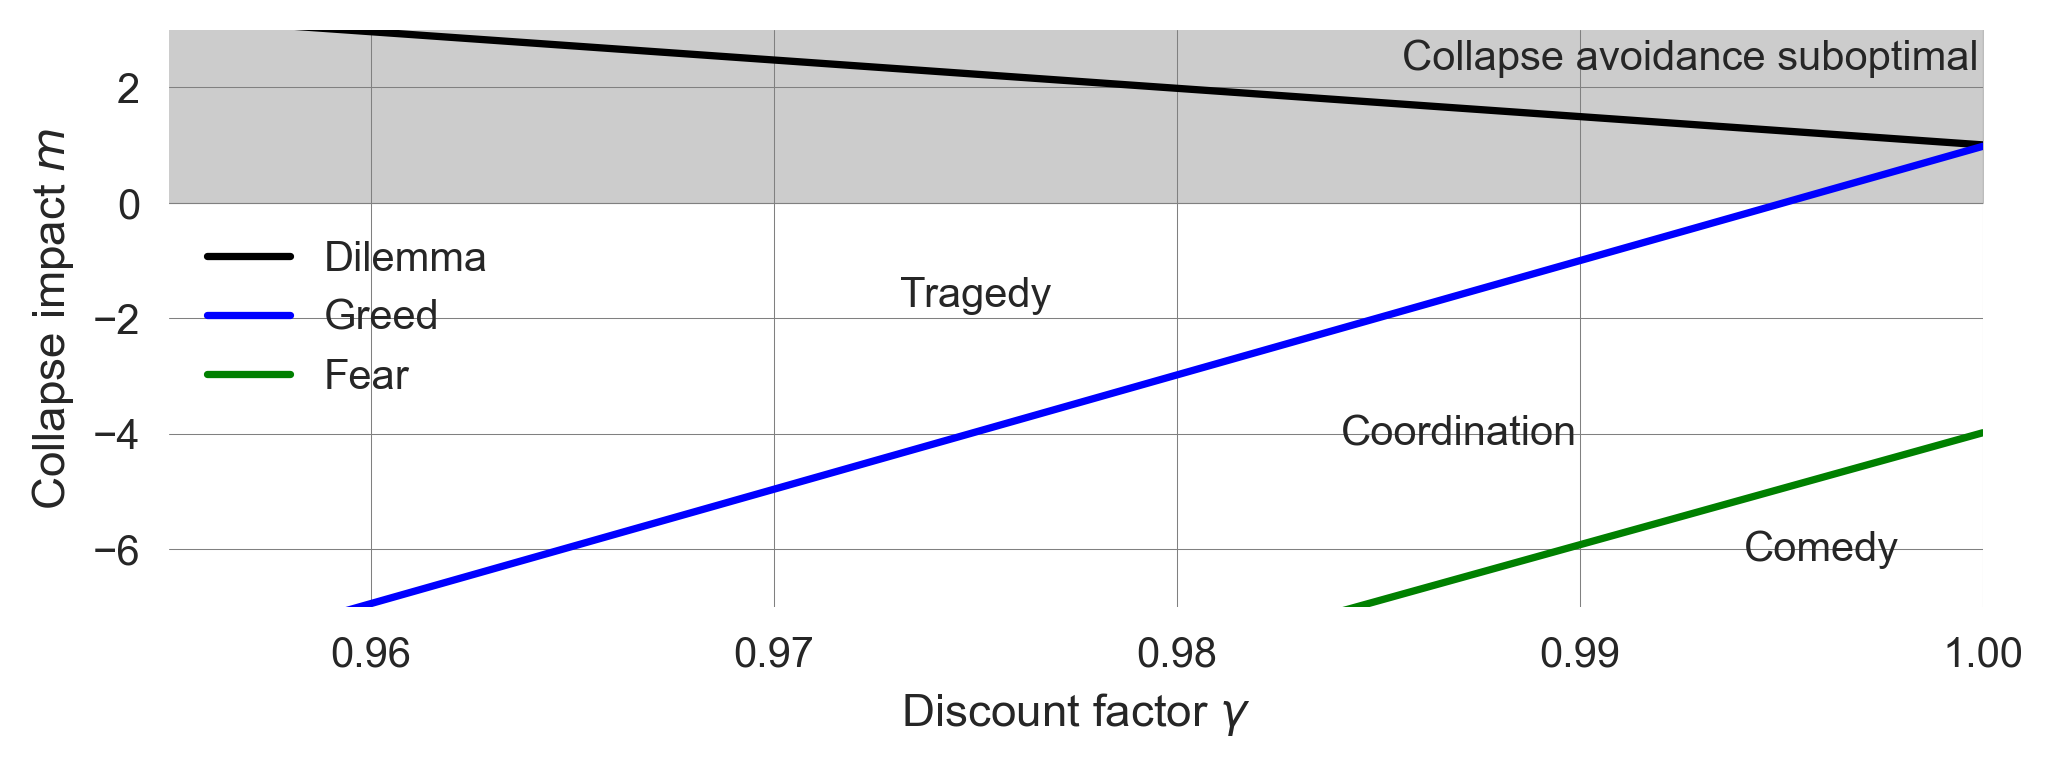

In [ ]:
dcf_values = np.linspace(0.95, 1.0, 100)

plt.plot(dcf_values, Fdilemma_m(vr, vc, vqc, vqr, dcf_values), 
         c='k', label='Dilemma')
plt.plot(dcf_values, Fgreed_m(vr, vc, vqc, vqr, dcf_values),
         c='b', label='Greed')
plt.plot(dcf_values, Ffear_m(vr, vc, vqc, vqr, dcf_values),
         c='g', label='Fear')

plt.fill_between(dcf_values, 0, 4, color='gray', alpha=0.4)

plt.annotate("Tragedy", (0.975, -1.6), ha='center', va='center')
plt.annotate("Coordination", (0.987, -4), ha='center', va='center')
plt.annotate("Comedy", (0.996, -6), ha='center', va='center')
plt.annotate("Collapse avoidance suboptimal", 
             (0.9999, 2.5), ha='right', va='center')

plt.legend(loc='center left'); plt.ylim(-7, 3); plt.xlim(0.955, 1.0);
plt.xlabel('Discount factor $\gamma$'); plt.ylabel('Collapse impact $m$');

This plot is a precise reproduction of the result by [@BarfussEtAl2020]. It highlights that

* the **same *care for the future*** that makes **individual decision-making** apt for the long-term also positively impacts collective decision-making.
* This ***care for the future* alone can turn a tragedy into a comedy**, where individual incentives are fully aligned with the collective interest - completely resolving the social dilemma.
* This is true, **given the anticipated collapse impact is sufficiently severe**. Thus, agents need to consider the catastrophic impact and, at the same time, be immensely future-oriented. 
* **No other mechanism is required**: Agents are anonymous, cannot reciprocate, and cannot make any agreements.

## Learning goals **revisited**

In this chapter,

* we introduced the concept of dynamic games and described the elements of a stochastic game.
* We applied the stochastic games framework to model human-environment interactions on the question, how the individual care for future consequences and the fact that we all are embedded into a shared environment impacts collective decision-making.
* We analyze the strategic interactions in this stochastic game model and found that caring for the future can turn a tragedy into a commedy of the commons.

::: {.content-hidden unless-profile="standalone"}

## References

:::

::: {.content-hidden unless-profile="housekeeping"}

## Housekeeping

With the following cells, we can convert this notebook into slides and a PDF handout. If you work with this notebook interactively, you can ignore them.

In [ ]:
# !jupyter nbconvert 03.02-StrategicInteractions.ipynb --to slides --embed-images --output-dir "./__slides"

---
metadata-files: [_standalone-quarto.yml]
---

In [ ]:
#| output: false 
!cp 03.03-DynamicInteractions.ipynb 03.03-DynamicInteractions_.ipynb
!quarto render 03.03-DynamicInteractions_.ipynb --to pdf --profile standalone
!mv 03.03-DynamicInteractions_.pdf __scripts/03.03-DynamicInteractions.pdf
!rm -r 03.03-DynamicInteractions_*

pandoc 
  to: latex
  output-file: 03.03-DynamicInteractions_.tex
  standalone: true
  pdf-engine: xelatex
  variables:
    graphics: true
    tables: true
    secnumdepth: 2
  default-image-extension: pdf
  metadata-files:
    - _standalone-quarto.yml
  toc-depth: 2
  
metadata
  documentclass: scrartcl
  classoption:
    - DIV=11
    - numbers=noendperiod
  papersize: A4
  header-includes:
    - '\KOMAoption{captions}{tableheading}'
  block-headings: false
  title: Dynamic Interactions
  bibliography:
    - CSMofHEI.bib
  geometry:
    - top=20mm
    - left=20mm
    - right=20mm
    - bottom=25mm
  link-citations: true
  number-depth: 2
  

Rendering PDF
running xelatex - 1
  This is XeTeX, Version 3.14159265-2.6-0.999992 (TeX Live 2020) (preloaded format=xelatex)
   restricted \write18 enabled.
  entering extended mode
  
running xelatex - 2
  This is XeTeX, Version 3.14159265-2.6-0.999992 (TeX Live 2020) (preloaded format=xelatex)
   restricted \write18 enabled.
  entering extended

:::